In [1]:
import pandas as pd
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Test_data/smithetal_normshared_Oct15.csv", index_col='strain')

In [5]:
mds = manifold.MDS(n_components=2, n_init=10, max_iter=100)
results = mds.fit(data.values)
strain = data.columns
coords = results.embedding_

/Users/jianichen1/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


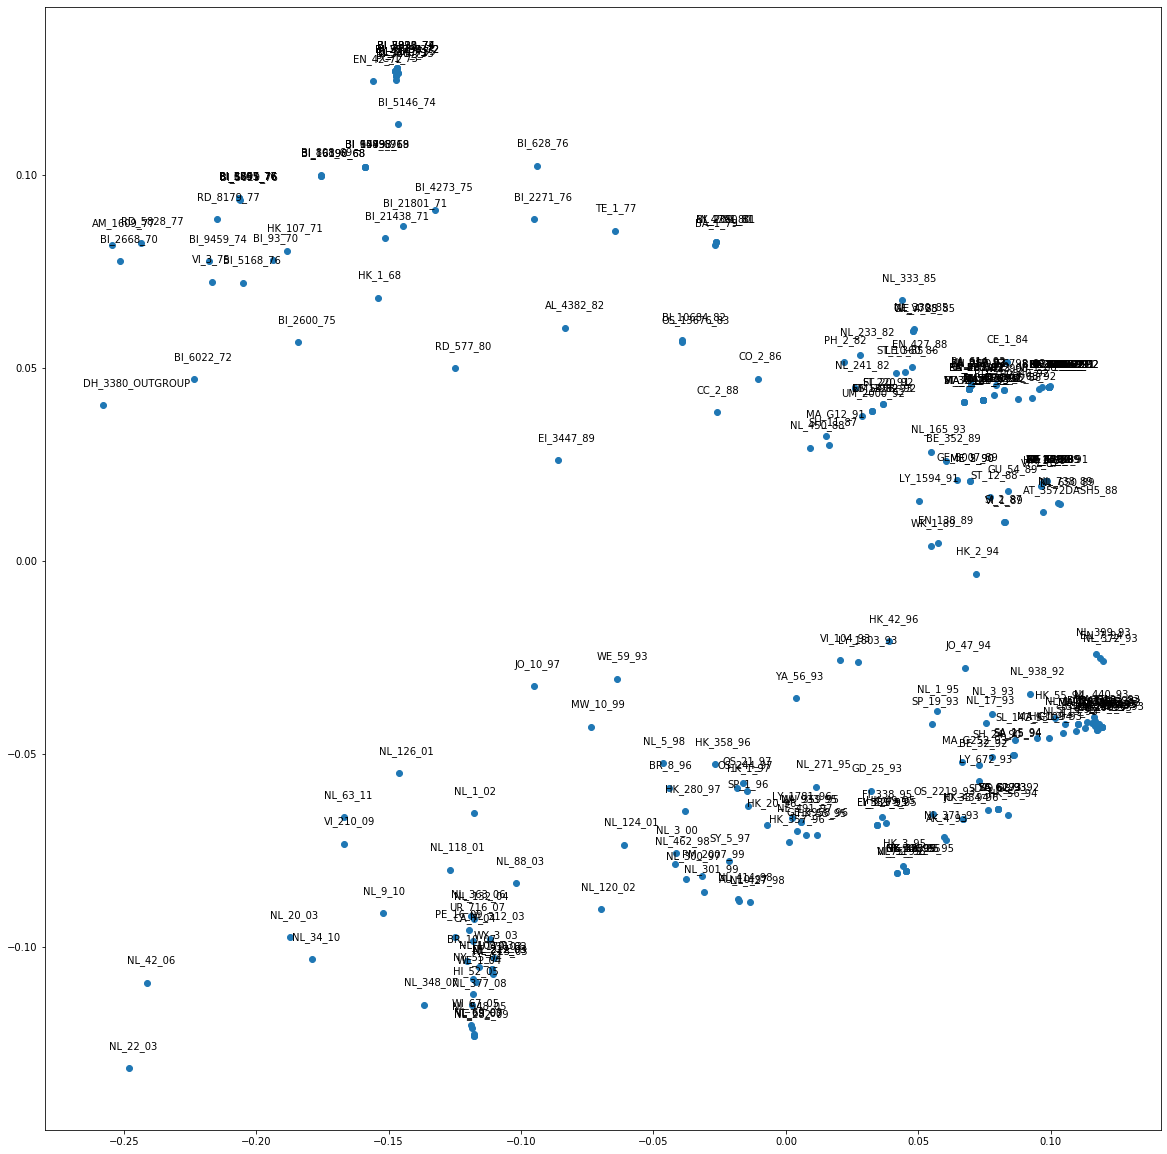

In [6]:
fig = plt.figure(figsize=(20,20))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(strain, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()

In [7]:
print(results)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=100, metric=True,
    n_components=2, n_init=10, n_jobs=None, random_state=None, verbose=0)


In [8]:
## k means to find the best number of group
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters = 11, random_state = 0)
cluster=kmeans.fit(coords)

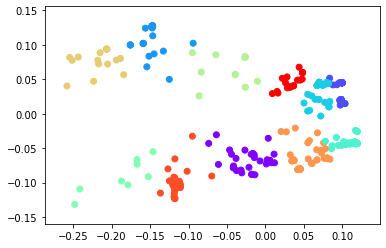

In [10]:
plt.scatter(coords[:,0],coords[:,1], c=kmeans.labels_, cmap='rainbow')

In [11]:
print(kmeans.labels_)

[ 8  6  7  3  1  1  0  6  8  3  1  6  2  2  2  7  2  2  2  2  2  6  2  2
  7  7  2  2  2  7  2  6  7  2  7  2  7  2  2  7  2  2  7  2  2  2  2  7
  7  9  0  1  9  6  1  6  7  6  3  3  3 10  2  4  3 10  9  1 10  4  8  8
  8  9  8  0  3  1  1  1  8 10  3  9  7  2  1  4  0  0  0  3  8  0  0  8
  8  8  8  8  4  0  8  3  1  1  9  8  8 10  1  1  1  1  1  1  3  0  8  4
  4  8  4  1  6  1  1  8  3  4  4  3  4 10  4  8  3  3  3  0  0  0  1  3
  4  9  4  9  9  0  5  4  9  3  8  4  8  4  9  8  6  5  9  9  9  5 10 10
  4  0  9  0  0  9 10 10  9  5  4  9  8  4  9  4  4  0  4  0  0  5  4 10
  0  9  0  1  5  1  9  9  1  3  3  1  9  3  8  3  4  5  9  1  6  0  8  4
  0  3  3  1  1  1  1  1  1  3  1  1  1  1  3  1  3  2  9 10  0  3  2  7
  7  4  1  4  1  1  8  8  8 10  8  3  4  4  8  0  1  1  1  4  1  1 10  3
  4 10 10  4  8  3  1  1  0  6  3 10 10  9  8  1  3  5  3  3  7  1  8  1
  9  3 10  0  1  9  3  0  9  0  8  8]


In [12]:
print(strain)

Index(['AK_4_93', 'AL_4382_82', 'AM_1609_77', 'AM_4112_92', 'AT_211_89',
       'AT_3572DASH5_88', 'AU_10_97', 'BA_1_79', 'BE_32_92', 'BE_352_89',
       ...
       'WE_4_85', 'WE_59_93', 'WE_5_89', 'WI_67_05', 'WK_1_89', 'WU_359_95',
       'WY_3_03', 'YA_56_93', 'YA_61_93', 'YA_62_93'],
      dtype='object', length=300)


In [13]:
install.packages("IRkernel")
IRkernel::installspec()

SyntaxError: invalid syntax (<ipython-input-13-4dcfde94c885>, line 2)

In [3]:
## standrize the EPICC content
## read the raw_shared dataframe
df=pd.read_csv("Test_data/Smith_raw_shared.csv")
df

,id,AK_4_93,AL_4382_82,AM_1609_77,AM_4112_92,AT_211_89,AT_3572DASH5_88,AU_10_97,BA_1_79,BE_32_92,...,WE_4_85,WE_59_93,WE_5_89,WI_67_05,WK_1_89,WU_359_95,WY_3_03,YA_56_93,YA_61_93,YA_62_93
0,AK_4_93,157.68431,90.98132,63.04225,111.91372,123.45760,125.35759,107.34131,95.79308,146.31109,...,115.85621,126.04251,123.45760,94.07740,118.52870,115.79870,94.07740,138.52712,151.06014,151.06014
1,AL_4382_82,90.98132,161.62590,78.36817,97.54592,105.22582,106.17838,81.48867,137.76512,97.71805,...,117.52720,81.47261,105.22582,68.07514,104.26562,83.37652,69.00820,95.88250,96.79744,96.79744
2,AM_1609_77,63.04225,78.36817,162.39701,69.77201,70.71490,70.73375,63.04455,89.00550,63.05285,...,81.16065,64.05919,70.71490,64.04791,61.07407,65.91116,63.08059,63.14917,62.13223,62.13223
3,AM_4112_92,111.91372,97.54592,69.77201,151.93741,137.55931,134.82205,112.11856,114.71623,117.74043,...,128.10790,90.78691,137.55931,93.03607,126.17049,115.89020,93.96913,104.28679,116.81982,116.81982
4,AT_211_89,123.45760,105.22582,70.71490,137.55931,152.86870,149.17342,111.13931,122.39613,129.28431,...,142.45926,102.33079,152.86870,94.01665,141.47988,113.07085,94.94971,115.83067,128.36370,128.36370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,WU_359_95,115.79870,83.37652,65.91116,115.89020,113.07085,114.97085,132.35095,92.07780,114.05570,...,105.46947,101.39294,113.07085,107.45457,108.13050,159.74504,109.34921,106.27173,118.80475,118.80475
296,WY_3_03,94.07740,69.00820,63.08059,93.96913,94.94971,94.97069,116.92473,77.71846,94.09107,...,90.15111,81.54438,94.94971,143.36055,87.21952,109.34921,160.24386,80.63436,93.16739,93.16739
297,YA_56_93,138.52712,95.88250,63.14917,104.28679,115.83067,117.73067,98.74159,100.69426,141.51828,...,108.22929,141.57778,115.83067,80.63436,110.90177,106.27173,80.63436,162.71261,146.26733,146.26733
298,YA_61_93,151.06014,96.79744,62.13223,116.81982,128.36370,130.26370,111.27461,101.60920,154.05130,...,120.76232,125.13249,128.36370,93.16739,123.43480,118.80475,93.16739,146.26733,158.80035,158.80035


In [5]:
# test with the function standrized
df[1,2]

KeyError: (1, 2)

In [1]:
## test with hamming distance
import argparse
import Bio.SeqIO
from collections import OrderedDict
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.spatial.distance import squareform, pdist


In [2]:
def hamming_distance(s1, s2):
    if len(s1) != len(s2):
        #raise ValueError("Strand lengths are not equal!")
        return(len(s2))

    return sum(ch1 != ch2 for ch1,ch2 in zip(s1,s2))

In [3]:
def nest_list(list1,rows, columns):    
        result=[]               
        start = 0
        end = columns
        for i in range(rows): 
            result.append(list1[start:end])
            start +=columns
            end += columns
        return result

In [4]:
def seq_ham(input):
    seq_record=OrderedDict()
    for seq1 in Bio.SeqIO.parse(input,"fasta"):
        seq_record[seq1.id]=str(seq1.seq)
    seq_names = list(seq_record.keys())
    
    dist=[]
    for s1 in seq_names:
        for s2 in seq_names:
            d=hamming_distance(seq_record[s1],seq_record[s2])
            dist.append(d)
     
    
    dist_array=nest_list(dist, len(seq_names),len(seq_names))
    dist_matrix=pd.DataFrame(dist_array,index=seq_names)
    dist_matrix.columns=seq_names
    return(dist_matrix)
    

In [5]:
test=seq_ham("EpiCC/RSVA_G_epicc_subsample1112.fasta")

In [4]:
seq_record=OrderedDict()
for seq1 in Bio.SeqIO.parse("EpiCC/RSVA_G_epicc_subsample1112.fasta","fasta"):
    seq_record[seq1.id]=str(seq1.seq)

In [5]:
seq_names = list(seq_record.keys())

In [6]:
dist=[]
for s1 in seq_names:
    #print(i)
    for s2 in seq_names:
        #print(j)
        d=hamming_distance(seq_record[s1],seq_record[s2])
        dist.append(d)
           
    

In [7]:
def nest_list(list1,rows, columns):    
        result=[]               
        start = 0
        end = columns
        for i in range(rows): 
            result.append(list1[start:end])
            start +=columns
            end += columns
        return result

In [8]:
dist_array=nest_list(dist, len(seq_names),len(seq_names))
dist_matrix=pd.DataFrame(dist_array,index=seq_names)
dist_matrix.columns=seq_names
dist_matrix

,KF826827-A-2004-Argentina-5/26/2004-GA5,KF826828-A-2004-Argentina-6/4/2004-GA5,KF530260-A-2005-Argentina-6/21/2005-GA5,KF826838-A-2006-Argentina-6/6/2006-GA2,KF826841-A-2007-Argentina-5/2/2007-GA5,KF826846-A-2008-Argentina-5/15/2008-GA5,KY883567-A-2015-Argentina-4/30/2015-ON1,KY883572-A-2015-Argentina-7/6/2015-ON1,MG839543-A-2015-Argentina-6/10/2015-ON1,MG773267-A-2016-Argentina-6/13/2016-ON1,...,KU950537-A-2014-USA-1/8/2014-ON1,MN630098-A-2016-USA-1/17/2016-ON1,MN630105-A-2016-USA-3/15/2016-ON1,MN630099-A-2016-USA-1/19/2016-ON1,KJ939951-A-2009-Viet_Nam-10/28/2009-GA2,KJ939935-A-2009-Viet_Nam-7/21/2009-GA2,KJ939936-A-2009-Viet_Nam-7/22/2009-GA2,KJ939941-A-2010-Viet_Nam-4/21/2010-GA2,KJ939947-A-2010-Viet_Nam-7/22/2010-GA2,KJ939949-A-2010-Viet_Nam-3/26/2010-GA2
KF826827-A-2004-Argentina-5/26/2004-GA5,0,8,25,70,16,13,152,152,150,154,...,148,149,150,154,72,70,69,71,75,72
KF826828-A-2004-Argentina-6/4/2004-GA5,8,0,21,71,10,7,155,155,153,157,...,151,152,155,155,73,71,70,72,76,73
KF530260-A-2005-Argentina-6/21/2005-GA5,25,21,0,70,29,26,154,154,152,156,...,149,151,156,154,72,70,69,71,77,72
KF826838-A-2006-Argentina-6/6/2006-GA2,70,71,70,0,71,74,94,93,94,94,...,92,89,100,92,9,10,9,9,13,9
KF826841-A-2007-Argentina-5/2/2007-GA5,16,10,29,71,0,11,155,155,153,157,...,151,152,155,155,73,71,70,72,76,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KJ939935-A-2009-Viet_Nam-7/21/2009-GA2,70,71,70,10,71,74,94,94,94,94,...,92,89,98,92,9,0,1,9,13,9
KJ939936-A-2009-Viet_Nam-7/22/2009-GA2,69,70,69,9,70,73,93,93,93,93,...,91,88,97,91,8,1,0,8,12,8
KJ939941-A-2010-Viet_Nam-4/21/2010-GA2,71,72,71,9,72,75,93,93,91,93,...,91,88,99,91,2,9,8,0,12,2
KJ939947-A-2010-Viet_Nam-7/22/2010-GA2,75,76,77,13,76,79,97,97,97,97,...,95,92,103,95,12,13,12,12,0,12


In [9]:
dist_matrix.to_csv("EpiCC/RSVA_G_epicc_subsample_genetic_hamming.csv")